In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Deep Learning for Prediction/Final Project/Zixin_model/lc_2016_2017.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (18,54) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,112435993,NaN,2300,2300,2300.0,36 months,12.62,77.08,C,C1,NaN,NaN,OWN,10000.0,Not Verified,Jun-2017,Current,n,NaN,credit_card,Credit card refinancing,148xx,NY,21.61,0,Sep-1985,1.0,NaN,NaN,4,0,3911.0,55.1,6,w,2029.91,2029.91,382.99,382.99,270.09,112.90,0.0,0.0,0.0,Dec-2017,77.08,Jan-2018,Dec-2017,0,NaN,1,Individual,NaN,NaN,NaN,0,0.0,3911.0,0.0,0.0,0.0,NaN,0.0,NaN,1.0,2.0,2315.0,55.0,7100.0,1.0,0.0,2.0
1,112290210,NaN,16000,16000,16000.0,60 months,12.62,360.95,C,C1,teacher,10+ years,MORTGAGE,94000.0,Not Verified,Jun-2017,Current,n,NaN,debt_consolidation,Debt consolidation,021xx,MA,25.61,0,Jun-1992,0.0,NaN,NaN,9,0,33752.0,105.8,26,w,14813.07,14813.07,2060.09,2060.09,1186.93,873.16,0.0,0.0,0.0,Dec-2017,360.95,Jan-2018,Dec-2017,0,NaN,1,Individual,NaN,NaN,NaN,0,0.0,234457.0,2.0,0.0,0.0,26.0,11078.0,69.0,3.0,5.0,1962.0,94.0,31900.0,0.0,6.0,1.0
2,112436985,NaN,6025,6025,6025.0,36 months,15.05,209.01,C,C4,Front Office,7 years,MORTGAGE,46350.0,Not Verified,Jun-2017,Current,n,NaN,home_improvement,Home improvement,018xx,MA,8.88,0,Jun-2002,0.0,NaN,NaN,11,0,12425.0,44.9,27,w,5340.82,5340.82,1032.46,1032.46,684.18,348.28,0.0,0.0,0.0,Dec-2017,209.01,Jan-2018,Dec-2017,0,NaN,1,Individual,NaN,NaN,NaN,0,0.0,121311.0,1.0,1.0,2.0,10.0,0.0,NaN,1.0,2.0,1950.0,45.0,27700.0,1.0,5.0,3.0
3,112439006,NaN,20400,20400,20400.0,36 months,9.44,652.91,B,B1,Manager,10+ years,RENT,44000.0,Source Verified,Jun-2017,Current,n,NaN,car,Car financing,913xx,CA,27.06,0,Jan-2007,1.0,NaN,NaN,15,0,8769.0,18.7,19,w,17898.81,17898.81,3237.80,3237.80,2501.19,736.61,0.0,0.0,0.0,Dec-2017,652.91,Jan-2018,Dec-2017,0,NaN,1,Individual,NaN,NaN,NaN,0,0.0,62335.0,1.0,1.0,1.0,6.0,53566.0,95.0,1.0,2.0,4240.0,60.0,46900.0,1.0,1.0,1.0
4,112438929,NaN,13000,13000,13000.0,36 months,11.99,431.73,B,B5,Paramedic,10+ years,MORTGAGE,85000.0,Source Verified,Jun-2017,Current,n,NaN,debt_consolidation,Debt consolidation,560xx,MN,6.79,1,Feb-2002,0.0,16.0,NaN,5,0,6866.0,88.0,24,w,11460.66,11460.66,2137.00,2137.00,1539.34,597.66,0.0,0.0,0.0,Dec-2017,431.73,Jan-2018,Dec-2017,0,16.0,1,Individual,NaN,NaN,NaN,0,0.0,15332.0,0.0,0.0,0.0,127.0,8466.0,72.0,0.0,1.0,2996.0,78.0,7800.0,0.0,0.0,0.0


In [ ]:
df.shape

(759338, 72)

In [ ]:
df0=pd.read_csv('/content/drive/MyDrive/Deep Learning for Prediction/Final Project/Zixin_model/lc_loan.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (19,55) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
list(set(df0.columns).difference(set(df.columns)))
#belong to dropped variables in training set

['open_il_6m', 'url']

In [ ]:
list(set(df.columns).difference(set(df0.columns)))

[]

# Data Cleaning-lc_loan (for training)

## 1 missing value NaN

In [ ]:
##Finding the the count and percentage of values that are missing in the dataframe.
df_null = pd.DataFrame({'Count': df.isnull().sum(), 'Percent': 100*df.isnull().sum()/len(df)})

##printing columns with null count more than 0
df_null[df_null['Count'] > 0] 


,Count,Percent
member_id,759338,100.000000
emp_title,50970,6.712426
emp_length,50363,6.632488
desc,759321,99.997761
title,23173,3.051737
zip_code,1,0.000132
dti,355,0.046751
inq_last_6mths,1,0.000132
mths_since_last_delinq,362705,47.765949
mths_since_last_record,618159,81.407621


total_acc

In [ ]:
df_LC=df[['loan_amnt', 'funded_amnt','funded_amnt_inv','term','int_rate', 'installment', 'grade', 'sub_grade','emp_title','emp_length',
'home_ownership','annual_inc','verification_status','issue_d','loan_status','pymnt_plan','purpose','title','dti', 'delinq_2yrs','earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util','total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']]
# start from the same df as the training set

In [ ]:
df_LC.shape

(759338, 47)

### 1.1 'collections_12_mths_ex_med'

In [ ]:
df_LC.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'purpose', 'title', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim'],
      dtype='object')

collections_12_mths_ex_med will change them null to 0 as missing vaules show lack of open trades.

In [ ]:
df_LC['collections_12_mths_ex_med']=df_LC['collections_12_mths_ex_med'].replace(np.nan,0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### 1.2 'mths_since_last_major_derog'/'mths_since_last_delinq'

Null values in these columns can't be replaced with 0 as it would mean that the last occurence was very recent. My understanding of these variables is that the key information is whether the specific action took place (delinquency, public record, worse rating), so I will turn these into binary categories of Yes (1), No (0).

In [ ]:
df_LC['mths_since_last_major_derog']=df['mths_since_last_major_derog']
df_LC['mths_since_last_delinq']=df['mths_since_last_delinq']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_LC.loc[(df_LC.mths_since_last_delinq.notnull()),'delinq']=1
df_LC.loc[(df_LC.mths_since_last_delinq.isnull()),'delinq']=0

df_LC.loc[(df_LC.mths_since_last_major_derog.notnull()),'derog']=1
df_LC.loc[(df_LC.mths_since_last_major_derog.isnull()),'derog']=0


df_LC.drop(['mths_since_last_delinq','mths_since_last_major_derog'],axis=1,inplace=True)



/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org

### 1.3 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'

 tot_coll_amt, tot_cur_bal, total_rev_hi_lim - these are three totals that have missing values for the same observations. I will change them to 0 as they should mean that the total is 0.

In [ ]:
variables2=['tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']

for e in variables2:
    df_LC[e]=df_LC[e].replace(np.nan,0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


### 1.4 revol_util
There is no clear answer to how to approach this variable, I will use 0 as this is the most common value and the amount of missing values is marginal.

In [ ]:
pd.value_counts(df_LC.revol_util).to_frame()

,revol_util
0.0,3380
57.0,1601
48.0,1558
59.0,1547
55.0,1544
...,...
121.7,1
131.3,1
130.2,1
126.3,1


In [ ]:
df_LC.revol_util=df_LC.revol_util.replace(np.nan,0)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


### 1.5 'acc_now_delinq', 'open_acc', 'total_acc','pub_rec','delinq_2yrs','inq_last_6mths','earliest_cr_line','annual_inc'
There are seven variables with 3 missing values, this is such a small number that I will just replace NaN with most common values.

In [ ]:
variables3=['acc_now_delinq', 'open_acc', 'total_acc','pub_rec','delinq_2yrs','inq_last_6mths','earliest_cr_line','annual_inc']

for e in variables3:
    df_LC[e]=df_LC[e].replace(np.nan,df_LC[e].mode()[0])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


## 2 look at each variable

### 2.1 describe a reason for the loan 'title'/'purpose' ('title' dropped)

In [ ]:
print(pd.value_counts(df_LC.title).to_frame())
print(pd.value_counts(df_LC.purpose).to_frame())

                            title
Debt consolidation         417193
Credit card refinancing    152348
Home improvement            55898
Other                       49953
Major purchase              17939
Medical expenses            10128
Car financing                8589
Business                     8000
Vacation                     6265
Moving and relocation        5864
Home buying                  3481
Green loan                    506
Credit Card Consolidation       1
                    purpose
debt_consolidation   431530
credit_card          157768
home_improvement      57197
other                 50680
major_purchase        18319
medical               10360
car                    8777
small_business         8235
vacation               6416
moving                 5973
house                  3561
renewable_energy        519
wedding                   3


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df_LC['purpose'])
purpose_label=le.transform(df_LC['purpose'])
del df_LC['purpose']
df_LC['purpose']=purpose_label

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_LC.drop(columns=['title'],inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


As 'title' includes too many catogries which is less helpful, so that we will use 'purpose', and drop 'title'

### 2.2 'application_type' binary

In [ ]:
pd.value_counts(df_LC.application_type).to_frame()

,application_type
Individual,725335
Joint App,34003


In [ ]:

app_type={'Individual':0,'Joint App':1}
df_LC.application_type.replace(app_type,inplace=True)

In [ ]:
df_LC['application_type'].unique()


array([0, 1])

### 2.3 'term'

In [ ]:
pd.value_counts(df_LC.term).to_frame()
term={'36 months':36,'60 months':60}
df_LC.term.replace(term,inplace=True)

TypeError: ignored

In [ ]:
df_LC['term'].unique()

array([36, 60])

### 2.4 'grade'/'sub_grade'






In [ ]:
#pd.value_counts(df_LC.grade).to_frame()
grade=df_LC.grade.unique()
grade.sort()
for x,e in enumerate(grade):
    df_LC.grade.replace(to_replace=e,value=x,inplace=True)
  

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
pd.value_counts(df_LC.sub_grade).to_frame()
sub_grade=df_LC.sub_grade.unique()
sub_grade.sort()
for x,e in enumerate(sub_grade):
    df_LC.sub_grade.replace(to_replace=e,value=x,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


### 2.5 'emp_title'/'emp_length' ('emp_title' dropped)
 describe title and length of employment

In [ ]:
pd.value_counts(df_LC.emp_title).to_frame()

,emp_title
Teacher,15479
Manager,14059
Owner,9797
Supervisor,6937
Registered Nurse,6406
...,...
Senior Director Human Resourced,1
Machine Operator and Team Lead,1
Syatems Engineer,1
Title insurance,1


Title has 212 thousand categories so it will be dropped.

In [ ]:
df_LC.drop(columns=['emp_title'],inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
pd.value_counts(df_LC.emp_length).to_frame()

,emp_length
10+ years,257944
2 years,69494
< 1 year,62724
3 years,60843
1 year,50585
5 years,46139
4 years,45573
6 years,32616
8 years,28707
9 years,28554


In [ ]:
df_LC['emp_length'].unique()

array([nan, '10+ years', '7 years', '6 years', '2 years', '8 years',
       '3 years', '< 1 year', '1 year', '9 years', '5 years', '4 years'],
      dtype=object)

In [ ]:
emp_len={'nan':0,'< 1 year':1,'1 year':2,'2 years':3,'3 years':4,'4 years':5,'5 years':6,'6 years':7,'7 years':8,'8 years':9,'9 years':10,'10+ years':11}
df_LC.emp_length.replace(emp_len,inplace=True)
df_LC.emp_length=df_LC.emp_length.replace(np.nan,0)
df_LC.emp_length.unique()

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


array([ 0., 11.,  8.,  7.,  3.,  9.,  4.,  1.,  2., 10.,  6.,  5.])

### 2.6 'home_ownership'

Home ownership variable should be informative for model as individuals who own their home should be much safer clients that ones that only rent it.

In [ ]:
pd.value_counts(df_LC.home_ownership).to_frame()

,home_ownership
MORTGAGE,371579
RENT,297100
OWN,90151
ANY,504
NONE,4


drop the rows of ANY

In [ ]:
df_LC = df_LC[df_LC.home_ownership != 'ANY']

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df_LC['home_ownership'])
home_ownership_label=le.transform(df_LC['home_ownership'])
del df_LC['home_ownership']
df_LC['home_ownership']=home_ownership_label

### 2.7 'verification_status'

In [ ]:
pd.value_counts(df_LC.verification_status).to_frame()

,verification_status
Source Verified,298481
Not Verified,249059
Verified,211294


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df_LC['verification_status'])
verification_status_label=le.transform(df_LC['verification_status'])
del df_LC['verification_status']
df_LC['verification_status']=verification_status_label

### 2.8 'pymnt_plan' (dropped)

In [ ]:
pd.value_counts(df_LC.pymnt_plan).to_frame()

,pymnt_plan
n,758290
y,544


as y <<n

In [ ]:
del df_LC['pymnt_plan']

### 2.9 'initial_list_status'

In [ ]:
pd.value_counts(df_LC.initial_list_status).to_frame()

,initial_list_status
w,580516
f,178318


In [ ]:
int_status={'w':0,'f':1}
df_LC.initial_list_status.replace(int_status,inplace=True)

### 2.10 'policy_code' (dropped)

In [ ]:
pd.value_counts(df_LC.policy_code).to_frame()

,policy_code
1,758834


In [ ]:
del df_LC['policy_code']

Policy code has only 1 value so will be dropped.

### 2.11 'recoveries'/'collection_recovery_fee' (dropped)

Recoveries variable informs about post charge off gross recovery. Will transform this to binary that will show whether this loan was recoveried. Will drop recovery fee as it is doubling similar information.

In [ ]:
pd.value_counts(df_LC.recoveries).to_frame()
df_LC['recovery'] = np.where((df_LC.recoveries != 0.00), 1, 0)


In [ ]:
del df_LC['recoveries']

In [ ]:
del df_LC['collection_recovery_fee']

### 2.12 transformed to date time:'issue_d','earliest_cr_line','last_pymnt_d','next_pymnt_d','last_credit_pull_d' 
(drop:'issue_d','last_credit_pull_d','next_pymnt_d')

Variables last_credit_pull_d is the most recent month LC pulled credit for this loan, issue_d is the date loan was issued and next_payment_d is the date of next payment. There are not insightful variables so will be dropped.

In [ ]:
df_LC.drop(['issue_d','last_credit_pull_d'],axis=1,inplace=True)

'last_pymnt_d' just checks if last payment is late. I will transform this variable to binary category showing if any payment was received.

In [ ]:
df_LC.loc[(df_LC.last_pymnt_d.notnull()),'pymnt_received']=1
df_LC.loc[(df_LC.last_pymnt_d.isnull()),'pymnt_received']=0

In [ ]:
del df_LC['last_pymnt_d']

In [ ]:
earliest_cr_line=pd.to_datetime(df_LC.earliest_cr_line)
df_LC.earliest_cr_line=earliest_cr_line.dt.year

In [ ]:
df_LC.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'annual_inc',
       'loan_status', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med',
       'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim', 'delinq', 'derog', 'purpose', 'home_ownership',
       'verification_status', 'recovery', 'pymnt_received'],
      dtype='object')

## 3 check null value

In [ ]:
##Finding the the count and percentage of values that are missing in the dataframe.
df_null = pd.DataFrame({'Count': df_LC.isnull().sum(), 'Percent': 100*df_LC.isnull().sum()/len(df_LC)})

##printing columns with null count more than 0
df_null[df_null['Count'] > 0] 

,Count,Percent
dti,355,0.046782


### 3.1 'dti'
dti is the ratio using the borrower’s total monthly debt payments on the total debt obligations divided by the borrower’s self-reported monthly income. (debt payments/income). 


In [ ]:
check=df_LC[df_LC['dti'].isna()]
pd.value_counts(check.loan_status).to_frame()

,loan_status
Current,312
Fully Paid,29
Late (31-120 days),6
Charged Off,5
In Grace Period,2
Late (16-30 days),1


As current and fully paid occupy most which are corresponding to the loan_status distribution, so that I assign the most frequent value 16.80 to the nan

In [ ]:
pd.value_counts(df_LC.dti).to_frame()

,dti
16.80,526
18.00,523
14.40,512
19.20,511
15.60,492
...,...
53.54,1
50.14,1
58.82,1
111.00,1


In [ ]:
df_LC.dti=df_LC.dti.replace(np.nan,16.8)

In [ ]:
##Finding the the count and percentage of values that are missing in the dataframe.
df_null = pd.DataFrame({'Count': df_LC.isnull().sum(), 'Percent': 100*df_LC.isnull().sum()/len(df_LC)})

##printing columns with null count more than 0
df_null[df_null['Count'] > 0] 

,Count,Percent


## 4 target value (Y): 'loan_status'

In [ ]:
df_LC['loan_status'].unique()

array(['Current', 'Fully Paid', 'In Grace Period', 'Late (31-120 days)',
       'Late (16-30 days)', 'Charged Off', 'Default'], dtype=object)

In [ ]:
pd.value_counts(df_LC.loan_status).to_frame()

,loan_status
Current,565127
Fully Paid,130641
Charged Off,37181
Late (31-120 days),15347
In Grace Period,6630
Late (16-30 days),3872
Default,36


{'0':'good', '1':'default'}\
{'0':['Fully Paid', 'Current','Late (16-30 days)','In Grace Period'], '1':['Late (31-120 days)','Default', 'Charged Off']}


In [ ]:
#df_LC = df_LC[df_LC.loan_status != 'Issued']

In [ ]:
status_type={'Fully Paid':0,'Current':0,
             'Late (31-120 days)':1,'Late (16-30 days)':0,
             'Default':1,'Charged Off':1,
             'In Grace Period':0}
df_LC.loan_status.replace(status_type,inplace=True)

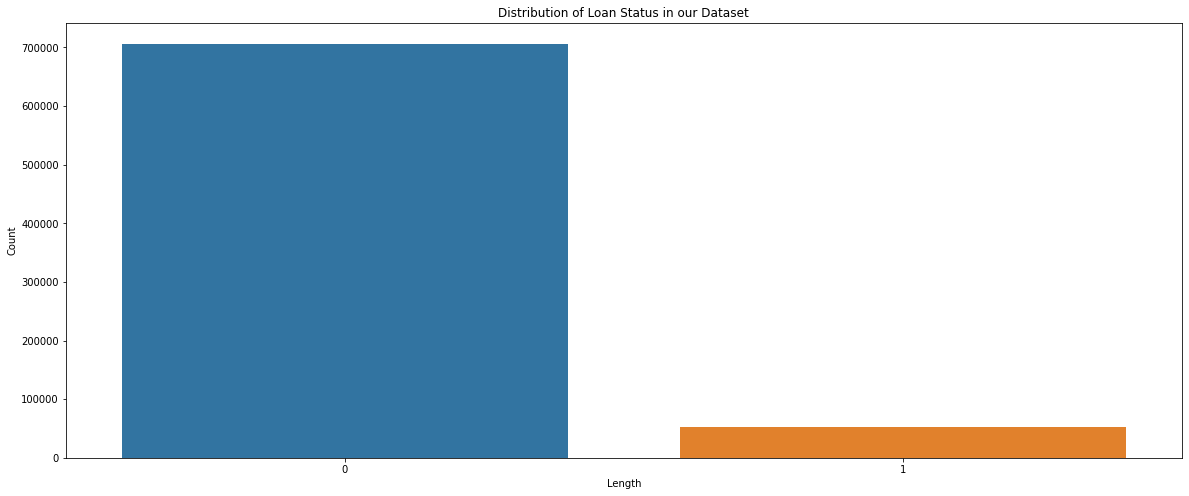

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
m =df_LC['loan_status'].value_counts()
m = m.to_frame()
m.reset_index(inplace=True)
m.columns = ['Loan Status','Count']
plt.subplots(figsize=(20,8))
sns.barplot(y='Count', x='Loan Status', data=m)
plt.xlabel("Length")
plt.ylabel("Count")
plt.title("Distribution of Loan Status in our Dataset")
plt.show()

As you can see, we have a lot of loans which are current with fair amount of fully paid loans. other categories (including) default have a really low number. This means the data is imbalanced and we might need to do something about this later in the analysis.

## 5 check the variables

In [ ]:
df_LC.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,loan_status,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,delinq,derog,purpose,home_ownership,verification_status,recovery,pymnt_received
0,2300,2300,2300.0,36,12.62,77.08,2,10,0.0,10000.0,0,21.61,0,1985,1.0,4,0,3911.0,55.1,6,0,2029.91,2029.91,382.99,382.99,270.09,112.90,0.0,77.08,0,0,0,0.0,3911.0,7100.0,0.0,0.0,1,2,0,0,1.0
1,16000,16000,16000.0,60,12.62,360.95,2,10,11.0,94000.0,0,25.61,0,1992,0.0,9,0,33752.0,105.8,26,0,14813.07,14813.07,2060.09,2060.09,1186.93,873.16,0.0,360.95,0,0,0,0.0,234457.0,31900.0,0.0,0.0,2,0,0,0,1.0
2,6025,6025,6025.0,36,15.05,209.01,2,13,8.0,46350.0,0,8.88,0,2002,0.0,11,0,12425.0,44.9,27,0,5340.82,5340.82,1032.46,1032.46,684.18,348.28,0.0,209.01,0,0,0,0.0,121311.0,27700.0,0.0,0.0,3,0,0,0,1.0
3,20400,20400,20400.0,36,9.44,652.91,1,5,11.0,44000.0,0,27.06,0,2007,1.0,15,0,8769.0,18.7,19,0,17898.81,17898.81,3237.80,3237.80,2501.19,736.61,0.0,652.91,0,0,0,0.0,62335.0,46900.0,0.0,0.0,0,3,1,0,1.0
4,13000,13000,13000.0,36,11.99,431.73,1,9,11.0,85000.0,0,6.79,1,2002,0.0,5,0,6866.0,88.0,24,0,11460.66,11460.66,2137.00,2137.00,1539.34,597.66,0.0,431.73,0,0,0,0.0,15332.0,7800.0,1.0,1.0,2,0,1,0,1.0


In [ ]:
df_LC.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'annual_inc',
       'loan_status', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med',
       'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim', 'delinq', 'derog', 'purpose', 'home_ownership',
       'verification_status', 'recovery', 'pymnt_received'],
      dtype='object')

In [ ]:
df_LC.shape

(758834, 42)

In [ ]:
df.shape

(759338, 72)

In [ ]:
df_check_train=['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'annual_inc', 'loan_status', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med',
       'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim', 'emp_length', 'verification_status', 'recovery',
       'delinq', 'derog', 'pymnt_received', 'home_ownership', 'purpose']

In [ ]:
list(set(df_LC.columns).difference(set(df_check_train)))

[]

In [ ]:
list(set(df_check_train).difference(set(df_LC.columns)))

[]

In [ ]:
len(list(set(df_check_train).intersection(set(df_LC.columns))))


42

## 6 export test data

In [ ]:
df_LC=df_LC[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'annual_inc', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med',
       'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim', 'delinq', 'derog', 'purpose', 'term',
       'home_ownership', 'verification_status', 'recovery', 'pymnt_received',
       'loan_status']]

In [ ]:
df_LC.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,annual_inc,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,delinq,derog,purpose,term,home_ownership,verification_status,recovery,pymnt_received,loan_status
0,2300,2300,2300.0,12.62,77.08,2,10,0.0,10000.0,21.61,0,1985,1.0,4,0,3911.0,55.1,6,0,2029.91,2029.91,382.99,382.99,270.09,112.90,0.0,77.08,0,0,0,0.0,3911.0,7100.0,0.0,0.0,1,36,2,0,0,1.0,0
1,16000,16000,16000.0,12.62,360.95,2,10,11.0,94000.0,25.61,0,1992,0.0,9,0,33752.0,105.8,26,0,14813.07,14813.07,2060.09,2060.09,1186.93,873.16,0.0,360.95,0,0,0,0.0,234457.0,31900.0,0.0,0.0,2,60,0,0,0,1.0,0
2,6025,6025,6025.0,15.05,209.01,2,13,8.0,46350.0,8.88,0,2002,0.0,11,0,12425.0,44.9,27,0,5340.82,5340.82,1032.46,1032.46,684.18,348.28,0.0,209.01,0,0,0,0.0,121311.0,27700.0,0.0,0.0,3,36,0,0,0,1.0,0
3,20400,20400,20400.0,9.44,652.91,1,5,11.0,44000.0,27.06,0,2007,1.0,15,0,8769.0,18.7,19,0,17898.81,17898.81,3237.80,3237.80,2501.19,736.61,0.0,652.91,0,0,0,0.0,62335.0,46900.0,0.0,0.0,0,36,3,1,0,1.0,0
4,13000,13000,13000.0,11.99,431.73,1,9,11.0,85000.0,6.79,1,2002,0.0,5,0,6866.0,88.0,24,0,11460.66,11460.66,2137.00,2137.00,1539.34,597.66,0.0,431.73,0,0,0,0.0,15332.0,7800.0,1.0,1.0,2,36,0,1,0,1.0,0


In [ ]:
df_LC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 758834 entries, 0 to 759337
Data columns (total 42 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   758834 non-null  int64  
 1   funded_amnt                 758834 non-null  int64  
 2   funded_amnt_inv             758834 non-null  float64
 3   int_rate                    758834 non-null  float64
 4   installment                 758834 non-null  float64
 5   grade                       758834 non-null  int64  
 6   sub_grade                   758834 non-null  int64  
 7   emp_length                  758834 non-null  float64
 8   annual_inc                  758834 non-null  float64
 9   dti                         758834 non-null  float64
 10  delinq_2yrs                 758834 non-null  int64  
 11  earliest_cr_line            758834 non-null  int64  
 12  inq_last_6mths              758834 non-null  float64
 13  open_acc      

In [ ]:
pip install pathlib2

In [ ]:
import pickle as pk
import pandas as pd
from pathlib2 import Path
import numpy as np
import os

def pk_read(path):
    with open(path, 'rb') as f:
        D = pk.load(f,encoding='utf8')
    return D

def pk_dump(fn, D):
    with open(fn, 'wb') as f:
        pk.dump(D, f, protocol=pk.HIGHEST_PROTOCOL)
    return 'Dumped Successfully!'

In [ ]:
data_pk=pk_dump('/content/drive/MyDrive/Deep Learning for Prediction/Final Project/Zixin_model/result/lc_2016_2017_processed_binary.pk',df_LC)

In [ ]:
#test_export=pk_read('/content/drive/MyDrive/Deep Learning for Prediction/Final Project/Zixin_model/result/lc_2016_2017_processed.pk')
#test_export.shape

(758834, 42)